In [2]:
import numpy as np
import pandas as pd
from pyne import data, nucname
from pyne.material import Material
from matplotlib import pyplot as plt

%matplotlib inline

## Read in 1 File of Gamma Spectra

In [3]:
results_path = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
#detector_dir = 'detector_response/d1_hpge/'#d2_detective_hpge/'
#numcol = 8192
detector_dir = 'detector_response/d6_sri2/'
numcol = 1024
detector_path = results_path + detector_dir

In [4]:
datidx = '1000'
datgz = detector_path + datidx + '.dat.gz'

In [5]:
def get_energy_bins(bindata):
    with open(bindata) as binfile:
        contents = binfile.readlines()
    binlist = []
    for ebin in contents[1].strip().split(' '):
        binlist.append(float(ebin))
    return binlist
energy_bins = get_energy_bins(detector_path + 'energy_bins.dat')

In [6]:
# reads in all 88 spectra in *.dat.gz into a df, and puts energy bins as columns
df = pd.read_csv(datgz, sep=' ', index_col=0, header=None, usecols=range(0, numcol+1), names=['DbIdx']+energy_bins, compression='gzip')

In [7]:
df.tail(1)

,0.000000,2.929688,5.859375,8.789062,11.718750,14.648440,17.578120,20.507810,23.437500,26.367190,...,2970.703000,2973.633000,2976.562000,2979.492000,2982.422000,2985.352000,2988.281000,2991.211000,2994.141000,2997.070000
DbIdx,,,,,,,,,,,,,,,,,,,,,
88087,0.0,634.6512,190193.3,423274.2,446835.8,462196.4,484547.8,529093.5,671139.7,899039.5,...,0.581467,0.562884,0.542981,0.520587,0.475436,0.460854,0.442477,0.409101,0.348482,0.424028


## Plot a Test Spectrum

In [8]:
df_idx = 88087

In [13]:
def plot_spectrum(df_idx):
    fig, ax = plt.subplots()
    ax.plot(energy_bins, df.loc[df_idx], linewidth = 2)
    ax.set_title('Spectrum, Idx: ' + str(df_idx), fontsize=12)
    #ax.set_xlim(0, 1700)
    ax.set_ylim(0, 6e5)
    plt.show()

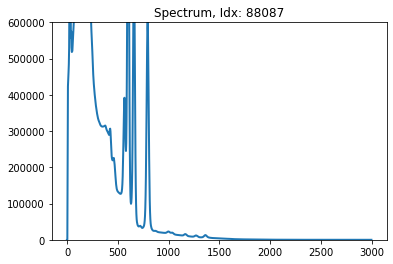

In [14]:
plot_spectrum(df_idx)

## Plot Spectrum with Energy Bin Windows

In [15]:
en_list_pkl = 'idx88087_energy_list_31.pkl' #two current options: 31 or 113
en_list = pd.read_pickle(results_path + 'detector_response/' + en_list_pkl)

In [25]:
en_delta = 10 #energy window in keV

In [29]:
def plot_spectrum_withlines(df_idx):
    fig, ax = plt.subplots(4, figsize=(18, 18))
    fig.suptitle('Spectrum, Idx: ' + str(df_idx), fontsize=18)
    for a in ax:
        a.plot(energy_bins, df.loc[df_idx], linewidth = 3)
        a.minorticks_on()
        for en in en_list:
            a.axvline(x=en, color='r', linewidth=0.5)
            a.axvspan(en - en_delta, en + en_delta, color='grey', alpha=0.3)
    ax[0].set_title('Low Energy', fontsize=12)
    ax[0].set_xlim(0, 450)
    ax[0].set_ylim(0, 1.2e6)
    ax[1].set_title('Med Energy', fontsize=12)
    ax[1].set_xlim(450, 900)
    ax[1].set_ylim(0, 1e6)
    ax[2].set_title('High Energy', fontsize=12)
    ax[2].set_xlim(900, 1700)
    ax[2].set_ylim(0, 1e4)
    ax[3].set_title('Highest Energy', fontsize=12)
    ax[3].set_xlim(1700, 3000)
    ax[3].set_ylim(0, 50)
    plt.show()

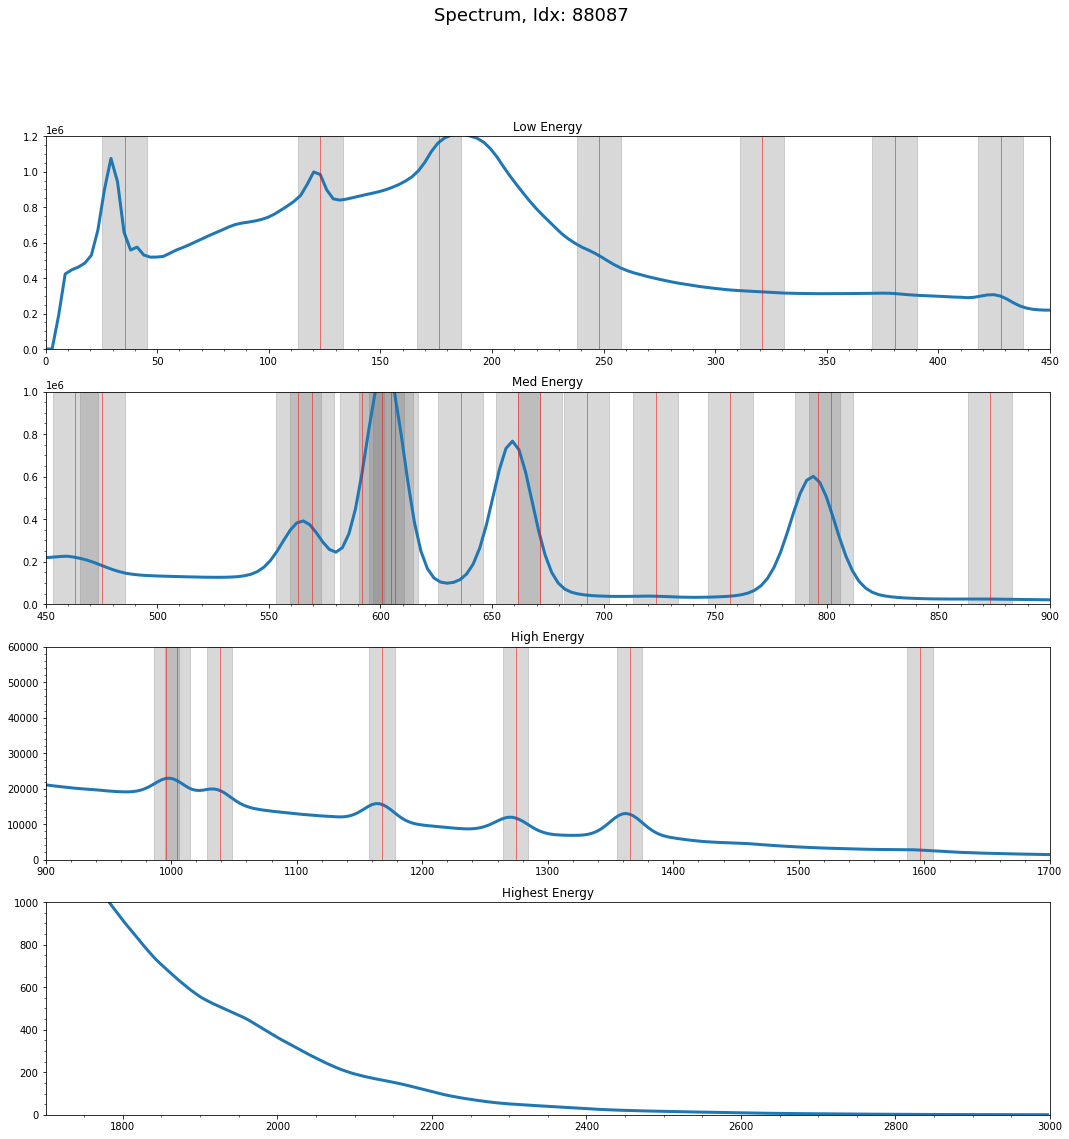

In [27]:
df_idx = 88087
plot_spectrum_withlines(df_idx)

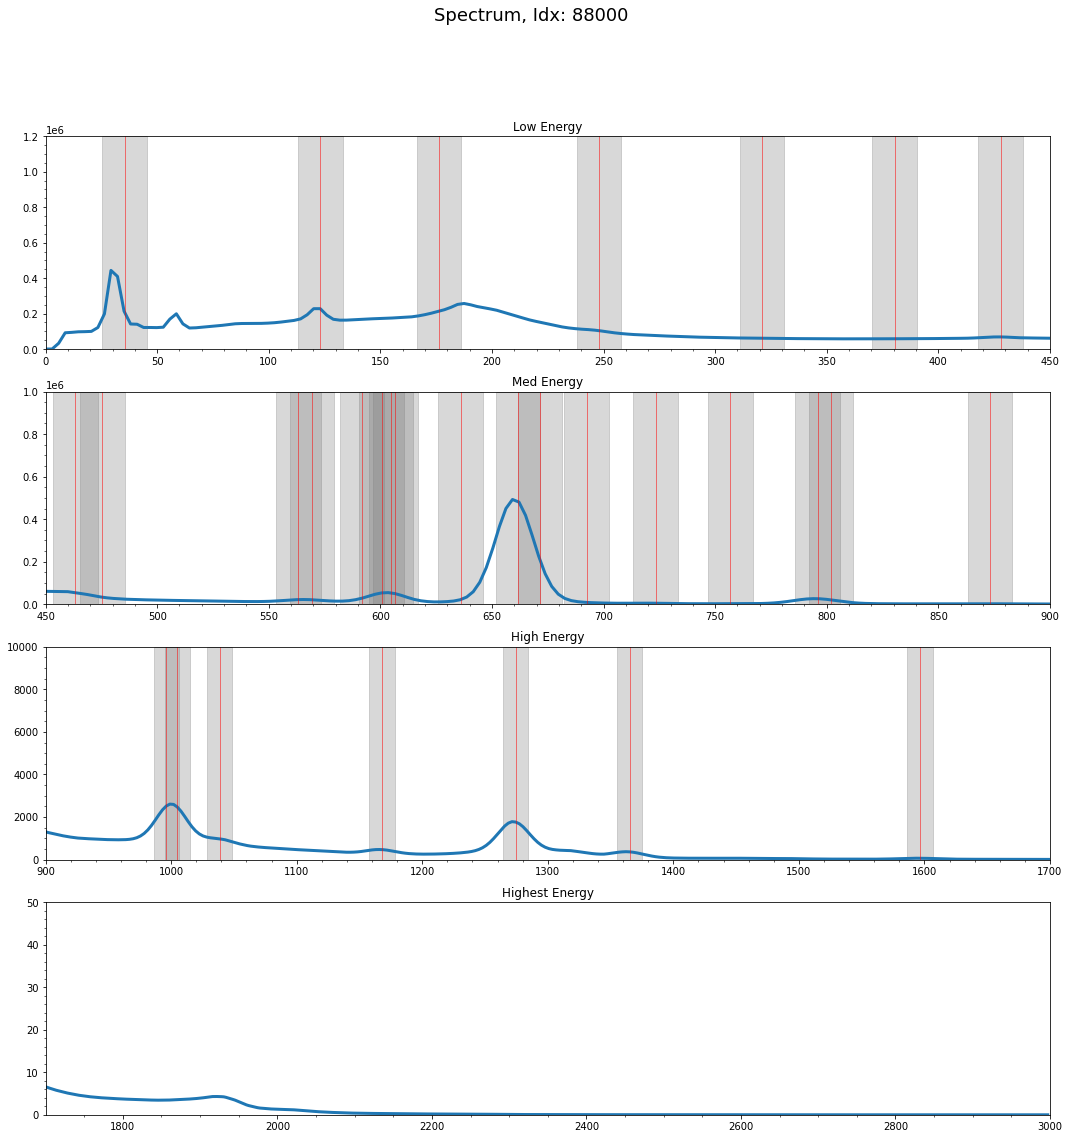

In [30]:
df_idx = 88000
plot_spectrum_withlines(df_idx)